In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read file
df=pd.read_excel("../OLOORDERS.xlsx")

In [3]:
df.columns = [u'WEB', u'CDis', u'Agen come', u'GVen', u'cod_venta', u'Cliente', 
              u'Nombre', u'Posición', u'Fecha crea', u'Producto', u'Descripcion', 
              u'Cantidad', u'UM', u'Venta neta', u'Moneda']
df.head()

,WEB,CDis,Agen come,GVen,cod_venta,Cliente,Nombre,Posición,Fecha crea,Producto,Descripcion,Cantidad,UM,Venta neta,Moneda
0,NEWOLO,20,5,17,101303229,40570,"SUMINISTROS DE P. E I. DAVID,S.A.",10,2016-10-31,000001228,"B.L/C PET BL. 210,0X297,0 20H",1,UN,11.45,EUR
1,NEWOLO,20,5,17,101303229,40570,"SUMINISTROS DE P. E I. DAVID,S.A.",20,2016-10-31,000001270,"C.I/L/C 70,0X 25,4 100H",1,UN,9.74,EUR
2,NEWOLO,20,5,9,101303230,13995,"INBAR, S.L.",10,2016-10-31,000012769,B.GOMA EVA BLANCO 400X600X2MM 5H,1,UN,1.74,EUR
3,NEWOLO,20,5,9,101303230,13995,"INBAR, S.L.",20,2016-10-31,000012768,B.GOMA EVA NEGRO 400X600X2MM 5H,1,UN,1.74,EUR
4,NEWOLO,20,5,18,101302933,105277,"DISPLAST, S.L.",10,2016-10-28,000010532,"C.MULTI3 210,0X148,0 500H",6,UN,96.00,EUR


In [4]:
#Number customers
len(df.Cliente.unique())

1905

In [5]:
#Number products
len(df.Producto.unique())

2908

In [6]:
#Number orders
len(df.cod_venta.unique())

66888

In [7]:
#Dates
print df['Fecha crea'].min()
print df['Fecha crea'].max()

2016-03-01 00:00:00
2017-03-25 00:00:00


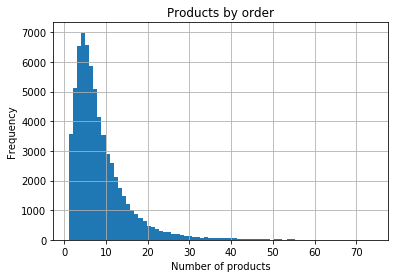

In [8]:
#Histogram Products by order
gr=df.groupby(["cod_venta"])["Producto"].apply(list)
size_comandes=[len(gr.iloc[i]) for i in np.arange(len(gr)) if len(gr.iloc[i])<75]
max_bins=max(size_comandes)
ax=pd.Series(size_comandes).hist(bins=max_bins)
plt.title("Products by order")
ax.set_xlabel("Number of products")
ax.set_ylabel("Frequency")

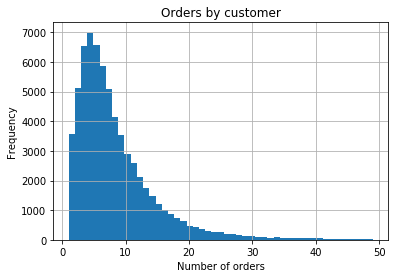

In [9]:
#Histogram Orders by customer
gr=df.groupby(["Cliente"])["cod_venta"].apply(list)
size_comandes_4clients=[len(np.unique(gr.iloc[i])) for i in np.arange(len(gr))]
size_comandes_4clients=pd.Series(size_comandes)
size_comandes_4clients=size_comandes_4clients[size_comandes_4clients<50]
max_bins=max(size_comandes_4clients)
ax=size_comandes_4clients.hist(bins=max_bins)
plt.title("Orders by customer")
ax.set_xlabel("Number of orders")
ax.set_ylabel("Frequency")
#pd.Series(size_comandes_4clients).hist(bins=max_bins)

In [10]:
#Read families
families=pd.read_csv("../Dades/Asignacion_productos.csv")
families = families.drop(families.columns[[0, 1, 3, 4, 5, 6, 7, 9, 10]], 1)
families.columns=["Area", "Material"]
print families.shape
families.head()

(2657, 2)


,Area,Material
0,143,000001776
1,143,000001777
2,143,000001778
3,143,000001781
4,143,000001782


In [11]:
#Numer families
len(families['Area'].unique())

167

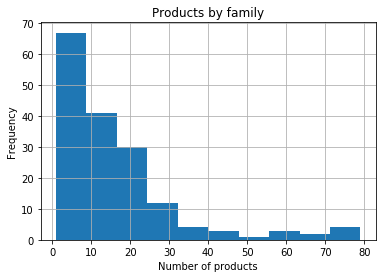

In [12]:
#Number products by family
gr=families.groupby(['Area'])['Material'].count()
ax=gr.hist(bins=10)
plt.title("Products by family")
ax.set_xlabel("Number of products")
ax.set_ylabel("Frequency")

In [13]:
# Intersect products from OLO and families
def intersect(a, b):
    return list(set(a) & set(b))

ProductsList=np.unique(np.array(df["Producto"]))
ProductsList_intersect=intersect(ProductsList, families["Material"].values)
df=df.loc[df['Producto'].isin(ProductsList_intersect)]

# Groupby Cliente and ProductsList
gr=df.groupby(["Cliente"])["Producto"].apply(list)
prod=pd.DataFrame(gr)
ProductsList=np.unique(np.array(df["Producto"]))

# Create ratings
ratings=pd.DataFrame(index=prod.index, columns=ProductsList)
ratings=ratings.fillna(0)
for i in np.arange(len(prod)):
    for j in np.arange(len(prod[prod.index==prod.index[i]]["Producto"].values[0])):
        ratings.loc[prod.index[i], prod[prod.index==prod.index[i]]["Producto"].values[0][j]]+=1

In [14]:
train_list=[]
train_cont=[]

for user in ratings.index:
    #aux=intersect(ratings_train.loc[user][ratings_train.loc[user]!=0.0].index, train_prod)
    aux=list(ratings.loc[user][ratings.loc[user]!=0.0].index)
    train_list.append(aux)
    train_cont.append(len(aux))

In [15]:
cont=pd.Series(train_cont)

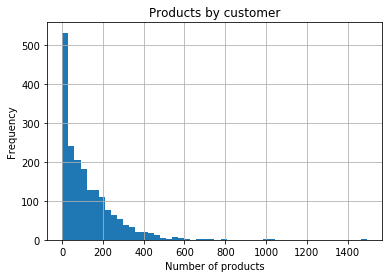

In [16]:
#Products by customer
ax=cont.hist(bins=50)
plt.title("Products by customer")
ax.set_xlabel("Number of products")
ax.set_ylabel("Frequency")

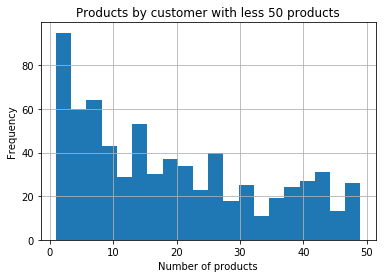

In [17]:
#Products by customer with less 50 products
ax=cont[cont<50].hist(bins=20)
plt.title("Products by customer with less 50 products")
ax.set_xlabel("Number of products")
ax.set_ylabel("Frequency")